In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from PIL import ImageGrab as IG

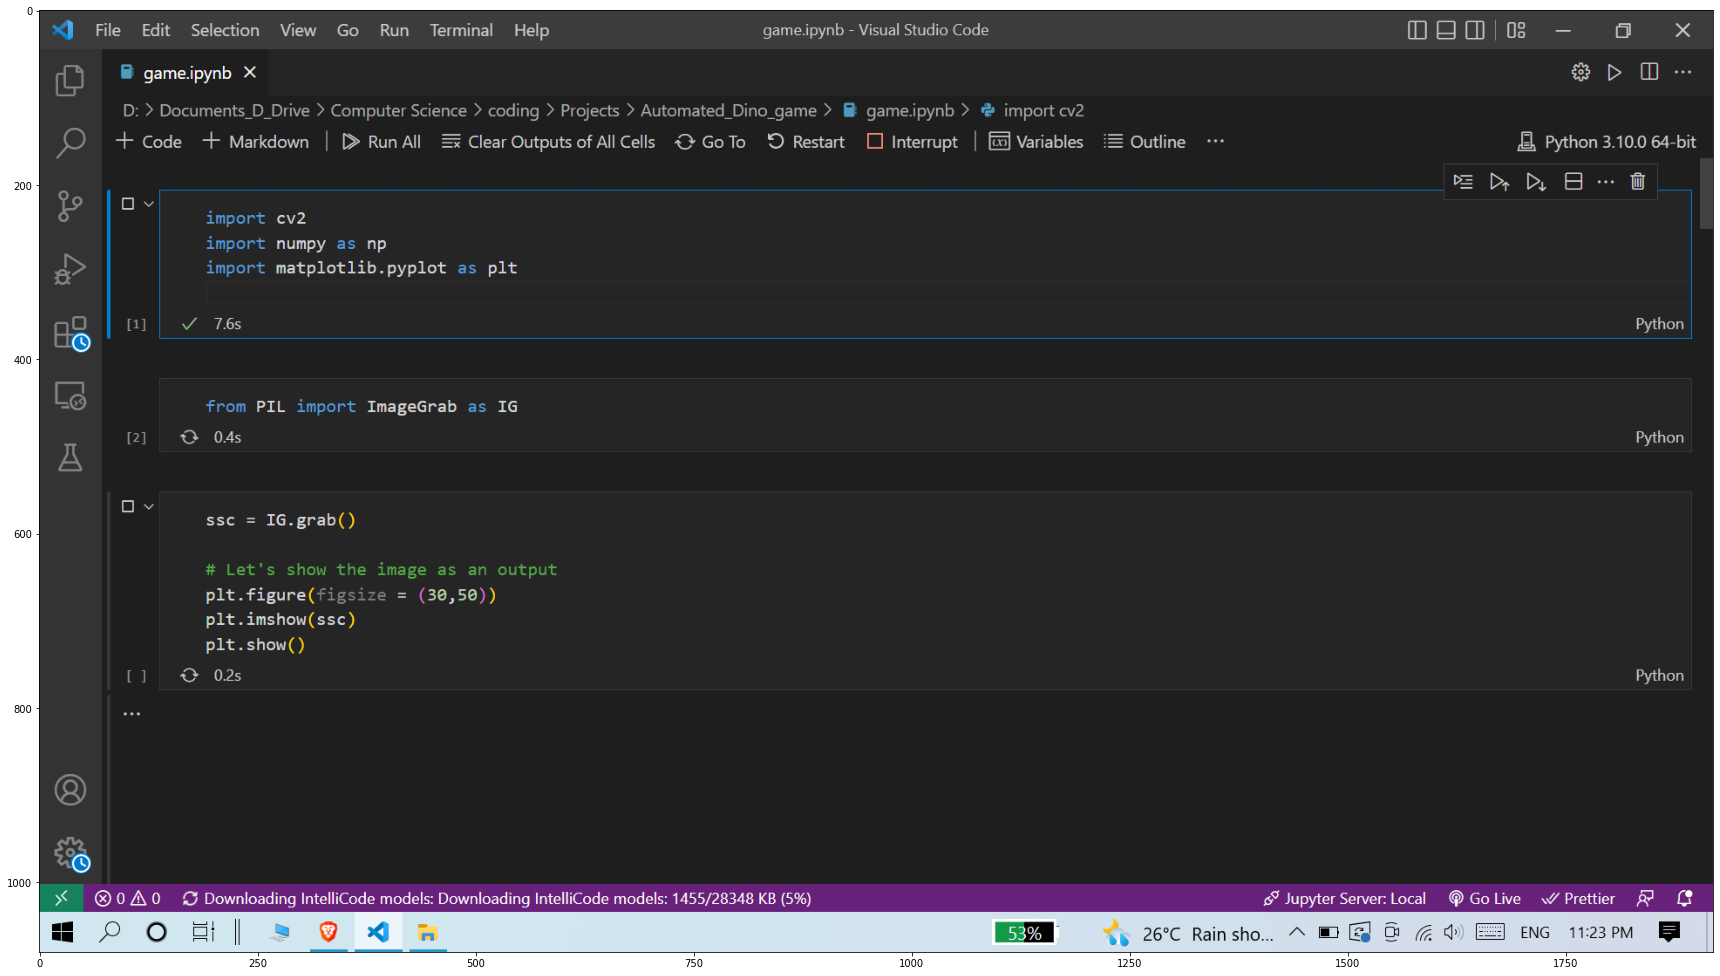

In [3]:
ssc = IG.grab()

# Let's show the image as an output
plt.figure(figsize = (30,50))
plt.imshow(ssc)
plt.show()

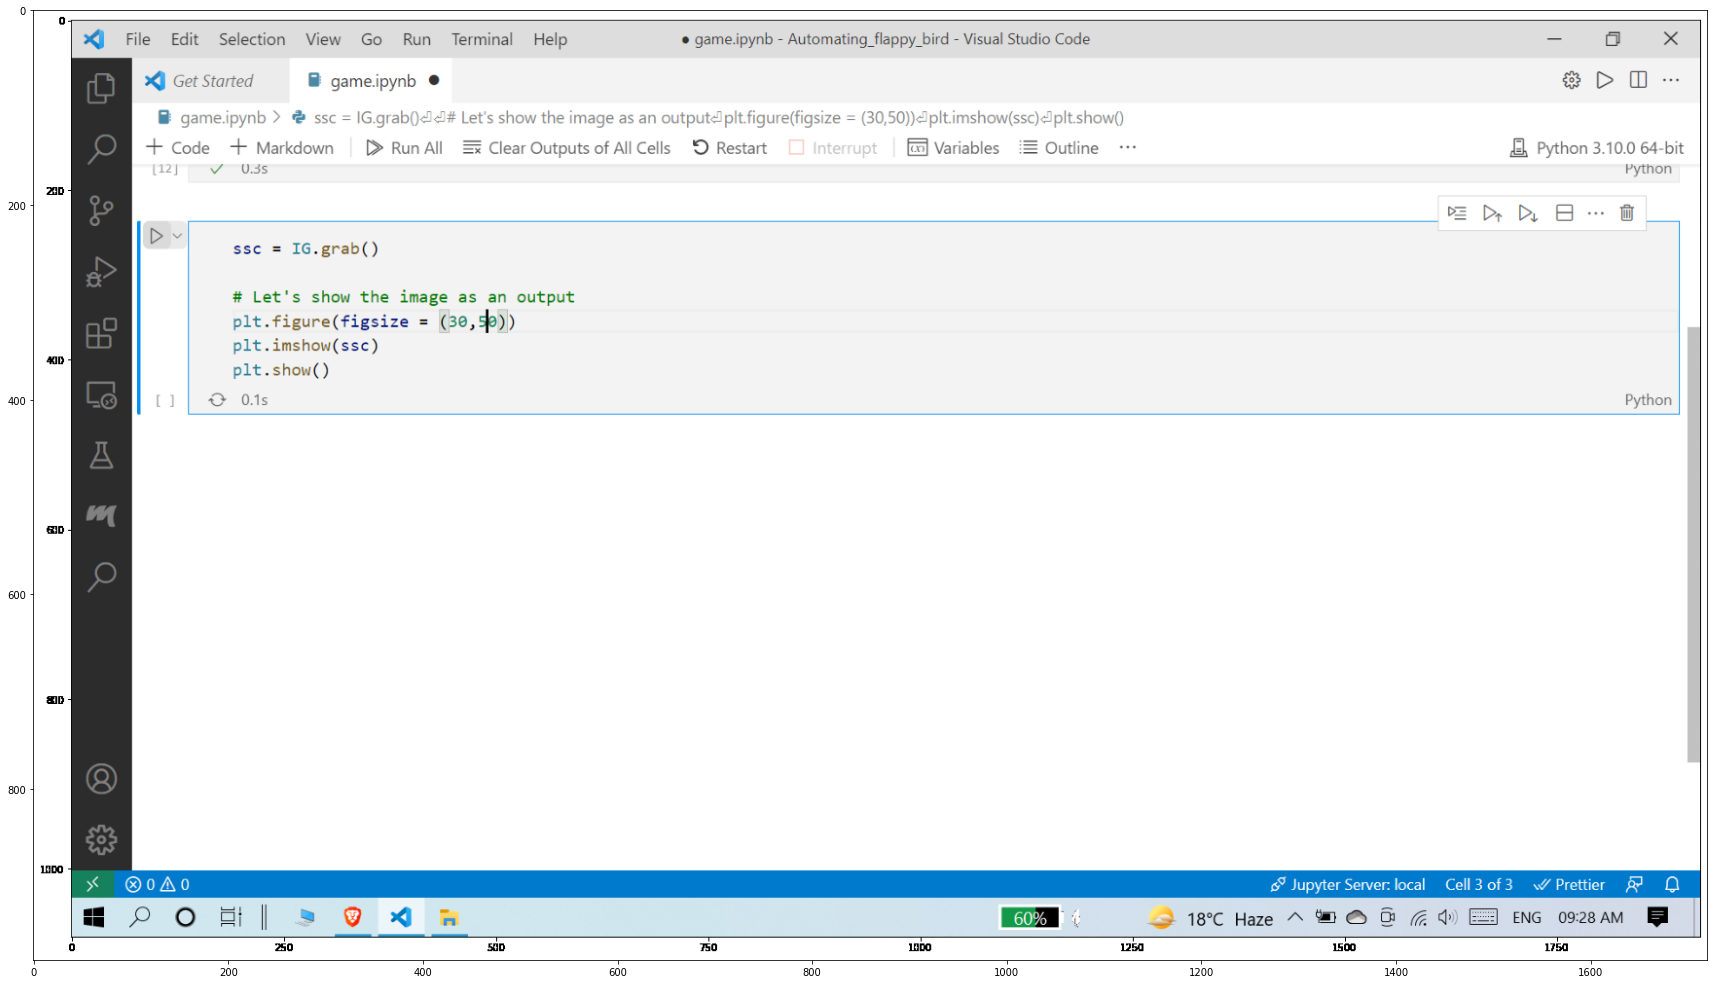

In [4]:
sample_img = cv2.imread('screen.png')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (30,50))
plt.imshow(sample_img)
plt.show()

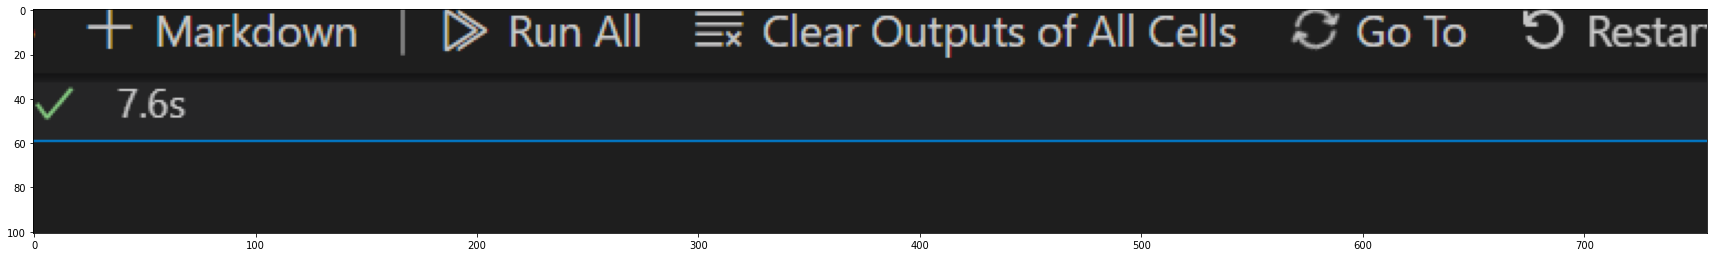

In [5]:
ssc = IG.grab(bbox = (163,141,919,242))

# Since the image got from IG.grab() is a pillow object we need to convert it into an array!
ssc = np.array(ssc)

# Let's show the image as an output
plt.figure(figsize = (30,50))
plt.imshow(ssc)
plt.show()
def grab_screen(bbox=None):
    screenshort = IG.grab(bbox)
    screenshort = np.array(screenshort)
    # since we have to use this image in the opencv that's why we have to convert the RGB image into BGR image!
    screenshort = cv2.cvtColor(screenshort, cv2.COLOR_RGB2BGR)
    return screenshort

In [6]:
ssc_img = grab_screen((805,182,1708,340))
cv2.imshow('Check',ssc_img)
key = cv2.waitKey(0)
print(key,' -- ',chr(key))
cv2.destroyAllWindows()

In [ ]:
class Dino_Game :
    
    # Constructer Function, called every time when an object is created!
    def __init__(self, path):
        
        # These all are the properties of each object!
        image = cv2.imread(path)
        self.image = image
        image.shape[0]
        image.shape[1]
        self.height = image.shape[0]
        self.width = image.shape[1]
        self.location = None
        
    # This function do the template matching of the object image in the screenshort of your screen!
    def match(self, screen_img):
        
        # Here we use cv2.TM_CCOEFF_NORMED method, but you have to perform many trials before choosing the perfect method.
        result = cv2.matchTemplate(screen_img, self.image, cv2.TM_CCOEFF_NORMED)
        min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(result)
        
        # Coordinate of the Top Left match template in the screen!
        top_left = max_loc
        
        # Coordinate of the Bottom Right match template in the screen!
        bottom_right = (max_loc[0]+self.width, max_loc[1]+self.height)
        
        # Threshold is the probability of how much the image is similar with other image!
        # Compare it's probability with the desirable threshold!
        if max_value > 0.85 :
            self.location = (top_left, bottom_right)
            return True
        else :
            self.location = None
            return False



In [ ]:
# Make a list of players
Dino = Dino_Game('dino.png')

# Make a list of enemies
Enemies = [Dino_Game('cact1.png'), Dino_Game('cact2.png'), Dino_Game('cact3.png'), Dino_Game('cact4.png'),
           Dino_Game('cact5.png'), Dino_Game('bird.png'), Dino_Game('bird1.png'), Dino_Game('bird2.png')]

In [ ]:
import time 
import pyautogui as pag
seconds = time.time()
print("Seconds since epoch =", seconds)

Seconds since epoch = 1641877784.1531532


In [ ]:
# as the time passes the speed of the game will increase and we have to jump earlier!
speed = 4

# acceleration
acceleration = 0.36

# the threshold at which we have to jump!
distanceThreshold = 156

# First we will check the dino icon in the screen and start the game!

while True :

    # Take the screenshot of the screen
    screen = grab_screen()

    # Match the dino template(detect)
    if Dino.match(screen):
        if Dino.location != None :
            topleft_x = int(Dino.location[0][0] - 0.25*Dino.width)
            topleft_y = int(Dino.location[0][1] - 2.65*Dino.height)
            bottomRight_x = int(Dino.location[1][0] + 10.25*Dino.width)
            bottomRight_y = int(Dino.location[1][1] + 0.3*Dino.height)
            TopLeft = (topleft_x, topleft_y)
            BottomRight = (bottomRight_x, bottomRight_y)
            break

# press space to start
pag.press('space')

# Time when you started the game
startTime = time.time()

# previous time(time before the action)
prevTime = time.time()

# Now the game is started 
while True :

    # we will select a small area from the screen, we will use that area to detect the enemies
    main_panal = grab_screen(bbox=(TopLeft[0], TopLeft[1], BottomRight[0], BottomRight[1]))

    # as the time progreses the speed of the game also increases, so we have to increase the distanceThreshold
    if time.time() - startTime > 12 and Dino.location:
        speed += speed*acceleration
        distanceThreshold += speed
        startTime = prevTime
        prevTime = time.time()

    if Dino.match(main_panal):
        if Dino.location:
            cv2.rectangle(main_panal, Dino.location[0], Dino.location[1], (255,0,0), 2)

    # Detect enemies from the given list
    for enemy in Enemies :
        if enemy.match(main_panal):
            cv2.rectangle(main_panal, enemy.location[0], enemy.location[1], (0,0,255), 2)
            if Dino.location:
                horizontalDistance = enemy.location[0][0] - Dino.location[1][0]
                verticalDistance = Dino.location[0][1] - enemy.location[1][1]

                if horizontalDistance <= distanceThreshold and horizontalDistance >= 0: 
                    
                    # if the enemie is above the dino head then we don't have to jump
                    if verticalDistance <= 0 :
                        pag.press('space')
                        break
                        
    # show the selected area
    cv2.imshow("Screen", main_panal)

    # If we press key q, then the program will stop
    if cv2.waitKey(1) == ord('q') :
        cv2.destroyAllWindows()
        break